In [1]:
import cv2
import numpy as np
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

In [3]:
p = Path('../data/kaggle_train/')

In [4]:
df = pd.DataFrame({'filenames': list(p.iterdir())})

In [5]:
df.head()

,filenames
0,../data/kaggle_train/26807.jpg
1,../data/kaggle_train/35850.jpg
2,../data/kaggle_train/6760.jpg
3,../data/kaggle_train/15957.jpg
4,../data/kaggle_train/32672.jpg


In [34]:
face_cascade = cv2.CascadeClassifier('../src/preprocessing/haarcascade_frontalface_default.xml')

In [51]:
def imread(fname):
    im = cv2.imread(str(fname))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [79]:
def get_faces(im):
    im_copy = np.copy(im)
    gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray_image)
    # face_crop = []
    # for f in faces:
    #     x, y, w, h = [v for v in f]
    #     face_crop.append(im_copy[y:y + h, x:x + w])
    return faces

In [70]:
im = imread('../data/kaggle_train/1101.jpg')

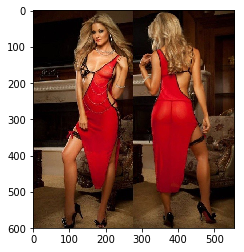

In [71]:
plt.imshow(im)

In [77]:
faces = get_faces(im)

In [78]:
len(faces)

2

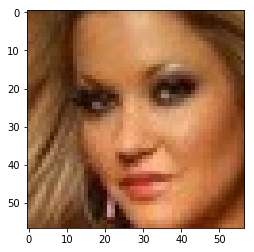

In [75]:
plt.imshow(faces[0])

In [84]:
df['face_bb'] = df.filenames.apply(lambda x: get_faces(imread(x)))

In [87]:
df['no_of_faces'] = df.face_bb.apply(len)

In [88]:
df.head()

,filenames,face_bb,no_of_faces
0,../data/kaggle_train/26807.jpg,"[[416, 492, 37, 37], [30, 12, 90, 90]]",2
1,../data/kaggle_train/35850.jpg,"[[90, 274, 83, 83], [336, 202, 113, 113]]",2
2,../data/kaggle_train/6760.jpg,"[[227, 33, 90, 90]]",1
3,../data/kaggle_train/15957.jpg,(),0
4,../data/kaggle_train/32672.jpg,(),0


In [91]:
df.to_pickle('../data/df_kaggle.pkl')

In [90]:
df.no_of_faces.value_counts()

0     15970
1     13495
2      7451
3      3314
4      1404
5       580
6       271
7       142
8        68
9        43
10       16
11        9
14        6
13        5
12        4
17        2
15        1
16        1
18        1
Name: no_of_faces, dtype: int64